# Pandas Project

*Este repositorio es un proyecto sobre la librería `pandas`de python que he realizado como tarea durante el bootcamp de Data Analytics de [Ironhack](https://www.ironhack.com/). Se trata del primer proyecto que realizamos.

Para realizarlo, hemos recibido el dataset *Global Shark Attack Incidents* disponible en [kaagle.com](https://www.kaggle.com/teajay/global-shark-attacks/version/1/kernels). Se trata de un archivo csv con datos sobre ataques de tiburones alrededor de todo el mundo.

El objetivo del proyecto es plantear una hipótesis y confirmarla con los datos del dataset. Sin embargo, los datos de la bbdd son muy caóticos, por lo que es necesario filtrar y limpiar los datos para poder confirmarla.

## Cargando el dataset

In [1]:
import pandas as pd
import re
import statistics as st

df = pd.read_csv("./GSAF5.csv", encoding="latin1")
display(df.head())

print(df.columns)
print(df.shape)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')
(5992, 24)


La base de datos contiene 5992 valores y 24 columnas. No obstante, muchos de las columnas contienen información poco útil (como las dos últimas, 'Unnamed: 22', 'Unnamed: 23') y la tabla contiene muchos valores nulos en algunas columnas.

In [2]:
null_cols = df.isnull().sum()
print(null_cols)

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64


## Mi hipótesis

La hipótesis que quiero comprobar es:

    Los tiburones pequeños son más peligrosos

La base de datos no tiene una columna de tamaño. Sin embargo, la columna `Species` contiene en muchas filas información sobre el tamaño del tiburón que ha mordido.

La columna `Species` contiene muchos valores nulos y los no nulos a lo mejor no contienen datos sobre el tamaño. Por tanto, los resultados me darán una muestra que a lo mejor no es representativa de la población. Sin embargo, se trata de un ejercicio de clase y he elegido dicha hipótesis porque:

- Me parece un ejercicio interesante de regex
- Contiene datos numéricos, al que le puedo aplicar más fácilmente las funciones estadísticas que hemos visto en clase.


## Limpieza del dataset

Crearé una nueva columna `Sizes` donde guardaré los tamaños. Compararé el número de ataques y su mortalidad con los tamaños. Por lo tanto, la limpieza es sencilla: Para verificar mi hipótesis únicamente necesito las columnas tamaño y `Fatal (Y/N)`.

Para empezar, consultado el método `.columns` se observa que las columnas `Species` y `Sex` tienen un espacio después de la palabra. Normalizamos las columnas:

In [3]:
print(df.columns)
clean_cols = list(map(lambda x: x.strip(), df.columns.copy()))
df.columns = pd.DataFrame(columns=clean_cols).columns
print(df.columns)

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')
Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


Por otra parte, en la columna `Type` hay columnas con el valor *Invalid*. Consultando varios PDFs adjuntos en la columna `href`, se observa que dichos ataques son avisos falsos, mordeduras post-mortem o casos muy muy dudosos.

Por tanto, decido borrar todos dichos datos.

In [4]:
df=df[df["Type"] != "Invalid"].copy()

In [5]:
null_cols = df.isnull().sum()
print(null_cols)
print(df.shape)

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     38
Area                       358
Location                   445
Activity                   407
Name                       147
Sex                        494
Age                       2383
Injury                      20
Fatal (Y/N)                  5
Time                      2837
Species                   2655
Investigator or Source      12
pdf                          0
href formula                 1
href                         2
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5472
Unnamed: 23               5472
dtype: int64
(5473, 24)


### Limpiando duplicados

Antes de limpiar las celdas, comprobaremos si nuestro df tiene duplicados. Como se observa en la siguiente operación, no existen filas duplicadas.

In [6]:
before = len(df)
df = df.drop_duplicates()
after = len(df)
print('Duplicados eliminados {}: '.format(str(before - after)))

Duplicados eliminados 0: 


### Limpieza de la columna `Species`

Por otra parte, observo que hay algunos datos en la columna `Species` que recogen, en una sola fila, tiburones de varios tamaños. Como por ejemplo, las siguientes:

> A partir de ahora, para mantener la variables `df` con los valores iniciales, todas las operaciones las haremos sobre una copia, `wdf`(*working dataframe*). Las únicas acciones sobre la df original han sido el *rename* de las columnas y la eliminación de los datos catalogados como *Inválidos*

In [7]:
wdf = df.copy()

aux = wdf[(wdf["Species"].str.contains("[\d\.]+\sm\s&\s[\d\.]+\sm|[\d\.]+\s'\s&\s[\d\.]+\s'")==True)]
print(aux.shape)
aux["Species"].value_counts()

(5, 24)


4.5 m & 5 m white shark                                       1
2 scalloped hammerhead sharks, 1.5 m & 1.8 m [5' & 6']        1
Said to involve 2 sharks: 5.2 m & 6 m [17' & 20']             1
2 sharks, 4.5 m & 3 m                                         1
Two sharks seen in vicinity: 2.4 m & 4.25 m  [8' & 14'] TL    1
Name: Species, dtype: int64

Para poder contabilizar dichos ataques como 2, en vez de como uno solo, decido hacer los siguiente:

* Añado dos filas al final de mi dataframe que son copias de la fila con dos ataques.
* Les cambio el valor de la fila `Species` por los dos tamaños diferentes.
* Borro de mi dataset la fila con el valor duplicado.

Esto lo he hecho con una función al que le enviamos el dataframe a modificar, las columnas afectadas y una expresión regular que saca por grupos los valores que queremos duplicar.

In [8]:
def quitarDuplicados(fdf, col, regex):
    aux_fdf = fdf.copy()
    for e in fdf[col].fillna("Unknown"):
        if re.search(regex, e):
            r = re.findall(regex, e)
            for i in r[0]:
                aux_fdf = pd.concat([aux_fdf.copy(), aux_fdf[aux_fdf[col]==e].copy()], ignore_index = True).copy()
                aux_fdf[col][aux_fdf.index.max()] = i
            aux_fdf = aux_fdf[aux_fdf[col]!=e].copy()
    return aux_fdf.copy()
        
wdf["Sizes"] = wdf["Species"].copy()
print(wdf.shape)    
wdf = quitarDuplicados(wdf.copy(), "Sizes", "([\d\.]+')\s&\s([\d\.]+')").copy()
print(wdf.shape)
wdf = quitarDuplicados(wdf.copy(), "Sizes", "([\d\.]+\sm)\s&\s([\d\.]+\sm)").copy()
print(wdf.shape)
display(wdf.iloc[-5:])

(5473, 25)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(5476, 25)
(5478, 25)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Sizes
5474,1959.01.17.b,17-Jan-59,1959,Unprovoked,AUSTRALIA,Tasmania,Safety Cove,In deep water about 100 yards from his ship,"Brian Derry, a Naval Rating",M,...,"Odessa American, 1/19/1959; G.P. Whitley, ref ...",1959.01.17.b-Derry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1959.01.17.b,1959.01.17.b,2105,NaN,NaN,20'
5475,2004.12.16,16-Dec-04,2004,Unprovoked,AUSTRALIA,South Australia,"West Beach, Adelaide",Scurfing (surfboard being towed behind a boat),Nick Peterson,M,...,"P. Kemp & T. Peake, GSAF",2004.12.16-Peterson-draft.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.12.16,2004.12.16,4598,NaN,NaN,4.5 m
5476,2004.12.16,16-Dec-04,2004,Unprovoked,AUSTRALIA,South Australia,"West Beach, Adelaide",Scurfing (surfboard being towed behind a boat),Nick Peterson,M,...,"P. Kemp & T. Peake, GSAF",2004.12.16-Peterson-draft.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.12.16,2004.12.16,4598,NaN,NaN,5 m
5477,2004.07.10,10-Jul-04,2004,Unprovoked,AUSTRALIA,Western Australia,"Lefthanders Beach, Margaret River",Surfing,Bradley Adrian Smith,M,...,"T. Peake, GSAF",2004.07.10-BradSmith.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.07.10,2004.07.10,4560,NaN,NaN,4.5 m
5478,2004.07.10,10-Jul-04,2004,Unprovoked,AUSTRALIA,Western Australia,"Lefthanders Beach, Margaret River",Surfing,Bradley Adrian Smith,M,...,"T. Peake, GSAF",2004.07.10-BradSmith.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.07.10,2004.07.10,4560,NaN,NaN,3 m


Como se observa, antes de aplicar la función, el dataframe tenía 5473 filas y después 5478. Es decir hemos agregado (*10 filas nuevas - 5 filas eliminadas*) **5 filas nuevas**.

Las últimas filas mostradas están duplicadas a excepción de los tamaños, que son los que estaban recogidos anteriormente, es decir:

<pre>
Two sharks seen in vicinity: 2.4 m & 4.25 m  [8' & 14'] TL
Said to involve 2 sharks: 5.2 m & 6 m [17' & 20']
<b style="color:red;">4.5 m</b> & <b style="color:red;">5 m</b> white shark
2 scalloped hammerhead sharks, 1.5 m & 1.8 m [5' & 6']
2 sharks, <b style="color:red;">4.5 m</b> & <b style="color:red;">3 m</b>
</pre>

A continuación, limpiamos la columna `Species` para quedarnos solo con los tamaños. Para ello, creo una nueva columna que llamaremos `Sizes` donde guardaremos los datos limpios.

La columna la limpieza a través de una función y mediante *regex*. Además, utilizamos la librería `statistics` para utilizar la función `mean`.

In [9]:
def create_sizes(spe):
    tmn_i = re.findall("\d+''|\d+\"", spe)
    tmn_oi = re.findall("[\d\.]+(?='')|[\d\.]+(?= '')|[\d\.]+(?=\")|[\d\.]+(?= \")", spe)
    tmn_f = re.findall("[\d\.]+'(?=[^'])|[\d\.]+'$", spe)
    tmn_of = re.findall("[\d\.]+(?=['][^'])", spe)
    tmn_m = re.findall("\d+[\.]?[\d]?[\d]?(?= m)|\d+[\.]?[\d]?[\d]?(?=m)", spe)
    tmn_om = re.findall("\d+[\.]?[\d]?[\d]?(?= m)|\d+[\.]?[\d]?[\d]?(?=m)", spe)
    tmn_cm = re.findall("[\d\.]+cm|[\d\.]+ cm", spe)
    tmn_ocm = re.findall("[\d\.]+(?=cm)|[\d\.]+(?= cm)", spe)
    if "UNKNOWN" in spe or not re.search("\d", spe):
        return "UNKNOWN"
    if len(tmn_f) > 0:
        if re.search("[\d\.]+'\d\"", spe):
            if len(re.findall("([\d\.]+)'([\d\.]+)\"", spe)) == 1:
                return round(float(re.findall("([\d\.]+)'([\d\.]+)\"", spe)[0][0])+\
                             float(re.findall("([\d\.]+)'([\d\.]+)\"", spe)[0][1])/12)
        elif len(tmn_f) == 1:
            return round(float(tmn_f[0][:-1]))
        elif re.search("([\d\.]+)(?='\s+to\s+([\d\.]+))", spe):
            return round(st.mean(map(float,re.findall("([\d\.]+)(?='\s+to\s+([\d\.]+))", spe)[0])))
    if len(tmn_i) > 0:
        if len(tmn_i) == 1:
            return round(float(tmn_oi[0])/12)
        elif re.search("([\d\.]+)(?=\"\s+to\s+([\d\.]+(?=\")))", spe):
            return round(st.mean(map(float,re.findall("([\d\.]+)(?=\"\s+to\s+([\d\.]+(?=\")))", spe)[0]))/12)
        elif re.search("([\d\.]+)(?= \"\s+to\s+([\d\.]+(?= \")))", spe):
            return round(st.mean(map(float,re.findall("([\d\.]+)(?= \"\s+to\s+([\d\.]+(?= \")))", spe)[0]))/12)
    if len(tmn_m) > 0:
        if len(tmn_m) == 1:
            return round(float(tmn_om[0])*3.281)
        elif re.search("([\d\.]+)(?=m\s+to\s+([\d\.]+))", spe):
            return round(st.mean(map(float,re.findall("([\d\.]+)(?=m\s+to\s+([\d\.]+))", spe)[0]))*3.281)
        elif re.search("([\d\.]+)(?= m\s+to\s+([\d\.]+))", spe):
            return round(st.mean(map(float,re.findall("([\d\.]+)(?= m\s+to\s+([\d\.]+))", spe)[0]))*3.281)
    if len(tmn_cm) > 0:
        if len(tmn_cm) == 1:
            return round(float(tmn_ocm[0])/30.48)
        elif re.search("([\d\.]+)(?=cm\s+to\s+([\d\.]+))", spe):
            return round(st.mean(map(float,re.findall("([\d\.]+)(?=cm\s+to\s+([\d\.]+))", spe)[0]))/30.48)
        elif re.search("([\d\.]+)(?= cm\s+to\s+([\d\.]+))", spe):
            return round(st.mean(map(float,re.findall("([\d\.]+)(?= cm\s+to\s+([\d\.]+))", spe)[0]))/30.48)    
    else:
        return "UNKNOWN"
    
wdf['Sizes'].fillna("UNKNOWN",inplace=True)
wdf['Sizes'] = wdf["Sizes"].apply(create_sizes)
wdf['Sizes'].value_counts()

UNKNOWN    3592
6           236
4           223
7           180
10          171
5           168
8           164
12          111
3            90
13           84
16           75
15           66
9            66
2            48
14           48
11           45
20           42
18           31
19           12
17            7
22            6
23            4
1             2
21            2
25            2
59            1
3819          1
Name: Sizes, dtype: int64

### Limpieza de la columna `Fatal (Y/N)`

Por último, limpio la columna `Fatal (Y/N)`. Esto es bastante más sencillo, ya que únicamente tiene algunos datos con espacios delante o hay diferencias entre mayúsculas y minúsculas.

Aprovechamos y guardamos las variables como `boolean`.

In [10]:
print(wdf["Fatal (Y/N)"].value_counts())
wdf['Fatal (Y/N)'].fillna("UNKNOWN",inplace=True)
wdf["Fatal (Y/N)"] = wdf["Fatal (Y/N)"].apply(lambda x: x.upper().strip())
wdf["Fatal (Y/N)"] = wdf["Fatal (Y/N)"].apply(lambda x: True if x == "Y" else False)
print(wdf["Fatal (Y/N)"].value_counts())

N          4082
Y          1312
UNKNOWN      70
 N            7
N             1
n             1
Name: Fatal (Y/N), dtype: int64
False    4166
True     1312
Name: Fatal (Y/N), dtype: int64


Finalmente, nos quedamos con los datos que necesitamos para nuestro estudio. La dataframe quedaría de la siguiente manera:

In [11]:
#wdf = wdf[(wdf["Sizes"] != "UNKNOWN") & (wdf["Fatal (Y/N)"] != "UNKNOWN")].copy()
#print(wdf.shape)

### Valores incorrectos

Parece que hay un par de valores raros en la columna size. En concreto 59 y 3819 pulgadas. Decido mostrarlo y buscar el error. Como se ve a continuación, se debe a que el *regex* ha considerado los mm como m. Además, uno de ellos es inválido, ya que habla de un *diente de tiburón de 18 mm* y no del tamaños del tiburón.

Hay otro valor también en la tabla que contiene la cadena *mm*.

Finalmente lo corrijo.

In [12]:
aux = wdf[(wdf["Sizes"]==59)]
display(aux[["Species", "Sizes"]])
aux = wdf[(wdf["Sizes"]==3819)]
display(aux[["Species", "Sizes"]])
aux = wdf[((wdf["Species"].str.contains("mm "))==True) | ((wdf["Species"].str.contains(" mm"))==True)]
display(aux[["Species", "Sizes"]])

,Species,Sizes
3420,"White shark, 18 mm tooth fragment recovered f...",59


,Species,Sizes
3430,"Lemon shark, 1164 mm, immature male, identifie...",3819


,Species,Sizes
3420,"White shark, 18 mm tooth fragment recovered f...",59
3430,"Lemon shark, 1164 mm, immature male, identifie...",3819
5010,5 mm 3500 kg female shark,16


In [13]:
wdf["Sizes"][(wdf["Species"].str.contains("1164 mm"))==True] = round(1164/304.8)
wdf["Sizes"][(wdf["Species"].str.contains("5 mm 3500 kg"))==True] = round(5*3.281)
wdf["Sizes"][(wdf["Species"].str.contains("18 mm tooth"))==True] = "UNKNOWN"

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
aux = wdf[((wdf["Species"].str.contains("mm "))==True) | ((wdf["Species"].str.contains(" mm"))==True)]
display(aux[["Species", "Sizes"]])

,Species,Sizes
3420,"White shark, 18 mm tooth fragment recovered f...",UNKNOWN
3430,"Lemon shark, 1164 mm, immature male, identifie...",4
5010,5 mm 3500 kg female shark,16


### Limpieza de tipos

Comprobamos los tipos de nuestras columnas. Para ello, antes nos vamos a quedar con las columnas que nos interesan, que son `Species`y `Fatal (Y/N)`.

In [15]:
wdf.fillna("UNKNOWN", inplace=True)
cdf = wdf[(wdf["Sizes"] != "UNKNOWN") & (wdf["Fatal (Y/N)"] != "UNKNOWN")].copy()
cdf = cdf[["Sizes", "Fatal (Y/N)"]].copy()
print(cdf.shape)

(1884, 2)


/home/alfonso/.local/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [16]:
print(cdf["Sizes"].dtype, cdf["Fatal (Y/N)"].dtype )

object bool


Nuestra columna Sizes es de tipo `object`, lo que significa que es un string.

La convertimos en tipo `int`.

In [17]:
cdf["Sizes"] = cdf["Sizes"].apply(int)
print(cdf["Sizes"].dtype, cdf["Fatal (Y/N)"].dtype )

int64 bool


### Valores extremos y *outliers*

Calculamos los valores extremos de nuestra columna numérica `Sizes`

In [18]:
stats = cdf.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
display(stats)

outliers = pd.DataFrame(columns=cdf.columns)

for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 1.5
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = cdf[(cdf[col] < lower) | 
                   (cdf[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)
    
display(outliers)

,count,mean,std,min,25%,50%,75%,max,IQR
Sizes,1884.0,8.618896,4.523284,1.0,5.0,7.0,12.0,25.0,7.0


/home/alfonso/.local/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Fatal (Y/N),Outlier,Sizes
551,False,Sizes,23
1722,False,Sizes,23
2551,True,Sizes,23
3084,False,Sizes,25
3686,False,Sizes,23
5276,True,Sizes,25


El resultado es que los tiburones de entre 23 y 25 pies (7-7.5 metros) son *outliers*.

No soy experto en tiburones, pero no me extrañaría que existieran algunos ejemplares así. Decido dejarlos tras comprobar que no son valores erróneos.

In [19]:
aux = wdf[wdf["Sizes"]!="UNKNOWN"]
aux["Sizes"] = aux["Sizes"].apply(int)
aux=aux[aux["Sizes"]>=23]
aux["Species"].value_counts()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Said to involve a 7 m [23'] white shark           2
White shark, 7m                                   1
7 m [23'] white shark                             1
Said to be a 7.6 m [25'] shark                    1
Alleged to involve a White shark, 7.6 m [25']     1
Name: Species, dtype: int64

In [20]:

################# GUARDAR ARCHIVO


In [37]:
cdf.reset_index(inplace=True)

## Comprobación de hipótesis

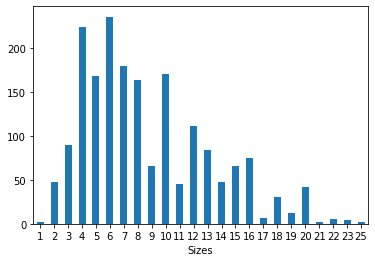

In [40]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

'''x = np.arange(4)
money = [1.5e5, 2.5e6, 5.5e6, 2.0e7]



fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x,cdf["Sizes"])
plt.xticks(x, ('Bill', 'Fred', 'Mary', 'Sue'))
plt.show()'''

#.plot.bar(rot=0)

cdf.groupby("Sizes").count()["index"].plot.bar(rot=0)